In [1]:
import scanpy as sc
import pandas as pd
from matplotlib import pylab
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import itertools
import plotly.express as px
import yaml


import numpy as np
import random
import anndata as ad
from scipy.sparse import  csr_matrix, issparse
from scipy import sparse

from matplotlib.colors import TwoSlopeNorm

import scanpy.external as sce
import sys


color_palette = {'DMSO' : '#4d4d4d',
                'ARYL_HYD_AGONIST':'#F8766D', 'ARYL_HYD_ANTAGONIST':"#F8766D50",
                'ANDROGEN_AGONIST':'#fccb17', 'ANDROGEN_ANTAGONIST':'#C49A0050',  
                "ESTROGEN_AGONIST": '#53B400', "ESTROGEN_ANTAGONIST": '#53B40050', 
                'GLUCOCORT_AGONIST' : '#00C094', 'GLUCOCORT_ANTAGONIST' : '#00C09450',
                'LIVER-X_AGONIST' : '#00B6EB', 'LIVER-X_ANTAGONIST' : '#00B6EB50', 
                'RET_AGONIST' : '#A58AFF', 'RET_ANTAGONIST' : '#A58AFF50', 
                'THYROID_AGONIST' : '#FB61D7', 'THYROID_ANTAGONIST' : '#FB61D750'
}

line_palette = {
    'CTL08A': "#99cfd670",  # azzurro pastello
    'CTL04E': "#f8c88a70",  # arancio pastello
}

In [2]:
import anndata

from pathlib import Path

In [3]:

pylab.rcParams['figure.figsize'] = (9, 9)
homeDir = os.getenv("HOME")
sys.path.insert(1, homeDir+"/utils/")



DS="hormones_substudy"


with open(homeDir+"/utils/ReferenceDict.yaml", 'r') as file:
    ReferencePaths = yaml.safe_load(file)
    for k in list(ReferencePaths.keys()):
        ReferencePaths[k]["adataPath"] = "/group/testa/Users/davide.castaldi/Polaroids_spinoff"+ReferencePaths[k]["adataPath"]
        #ReferencePaths[k]["signaturePath"] = homeDir+ReferencePaths[k]["signaturePath"]
        ReferencePaths[k]["signaturePath"] = "/group/testa/Users/davide.castaldi/Polaroids_spinoff"+ReferencePaths[k]["signaturePath"]
        ReferencePaths[k]["signaturePurityPath"] = "/group/testa/Users/davide.castaldi/Polaroids_spinoff"+ReferencePaths[k]["signaturePurityPath"]


sc.settings.set_figure_params(dpi=50, facecolor='white', dpi_save=500)
pylab.rcParams['figure.figsize'] = (6, 6)
dir_path = homeDir+"/adatas/{}_ByMacroCelltype".format(DS)



def sanitize_strings(value):
    if isinstance(value, str):  # Only process string values
        return (
            value.replace('_', '')  # Replace underscores with spaces
            .replace('-', '')      # Replace hyphens with spaces
            .replace('@', '')       # Example: Remove "@" character
        )
    return value  # Leave non-strings untouched



# Import DA results neurons and progenitors

In [4]:
#tmp.write_h5ad(homeDir+"/ENDPOINTS_sc/{}.{}.LineMagnification.h5ad".format(DS,"progenitors"))

In [5]:
adataProgenitors = sc.read_h5ad(homeDir+"/adatas/{}_ByMacroCelltype/{}.Progenitors.LineMagnification.DA.h5ad".format(DS,DS))

In [6]:
adataNeurons = sc.read_h5ad(homeDir+"/adatas/{}_ByMacroCelltype/{}.Neurons.LineMagnification.DA.h5ad".format(DS,DS))

In [7]:
adataProgenitors.obs.condition.unique().tolist()

['ESTROGEN_AGONIST',
 'ESTROGEN_ANTAGONIST',
 'ANDROGEN_AGONIST',
 'ANDROGEN_ANTAGONIST',
 'ARYL_HYD_AGONIST',
 'ARYL_HYD_ANTAGONIST',
 'LIVER-X_AGONIST',
 'LIVER-X_ANTAGONIST',
 'GLUCOCORT_AGONIST',
 'GLUCOCORT_ANTAGONIST',
 'THYROID_AGONIST',
 'THYROID_ANTAGONIST',
 'DMSO',
 'RET_AGONIST',
 'RET_ANTAGONIST']

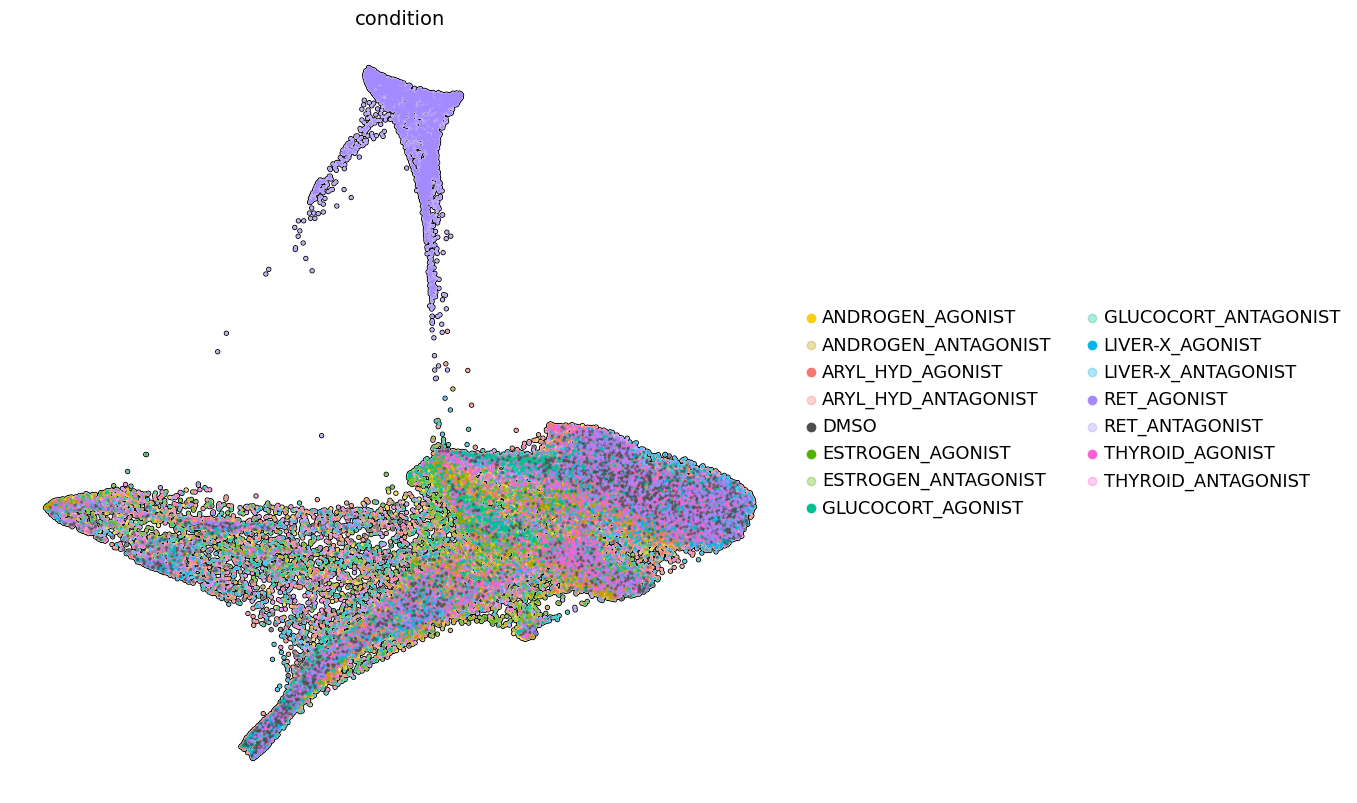

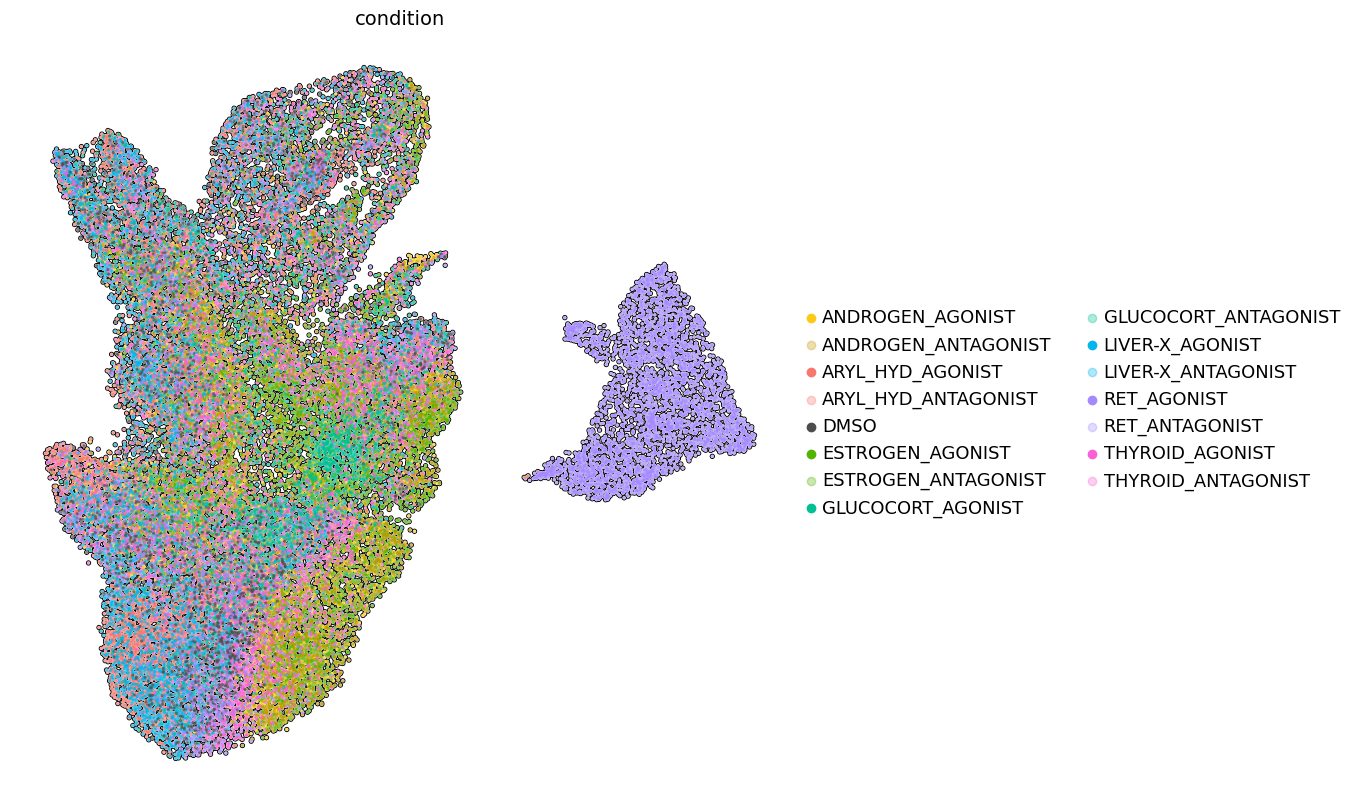

In [8]:
pylab.rcParams['figure.figsize'] = (10, 10)

sc.pl.embedding(adataProgenitors, basis = "X_draw_graph_fa", color=["condition"], frameon=False, size=20, add_outline=True, save="Progenitors_condition.png", palette = color_palette)
sc.pl.umap(adataProgenitors, color=["condition"], frameon=False, size=20, add_outline=True, save="Progenitors_condition.png")

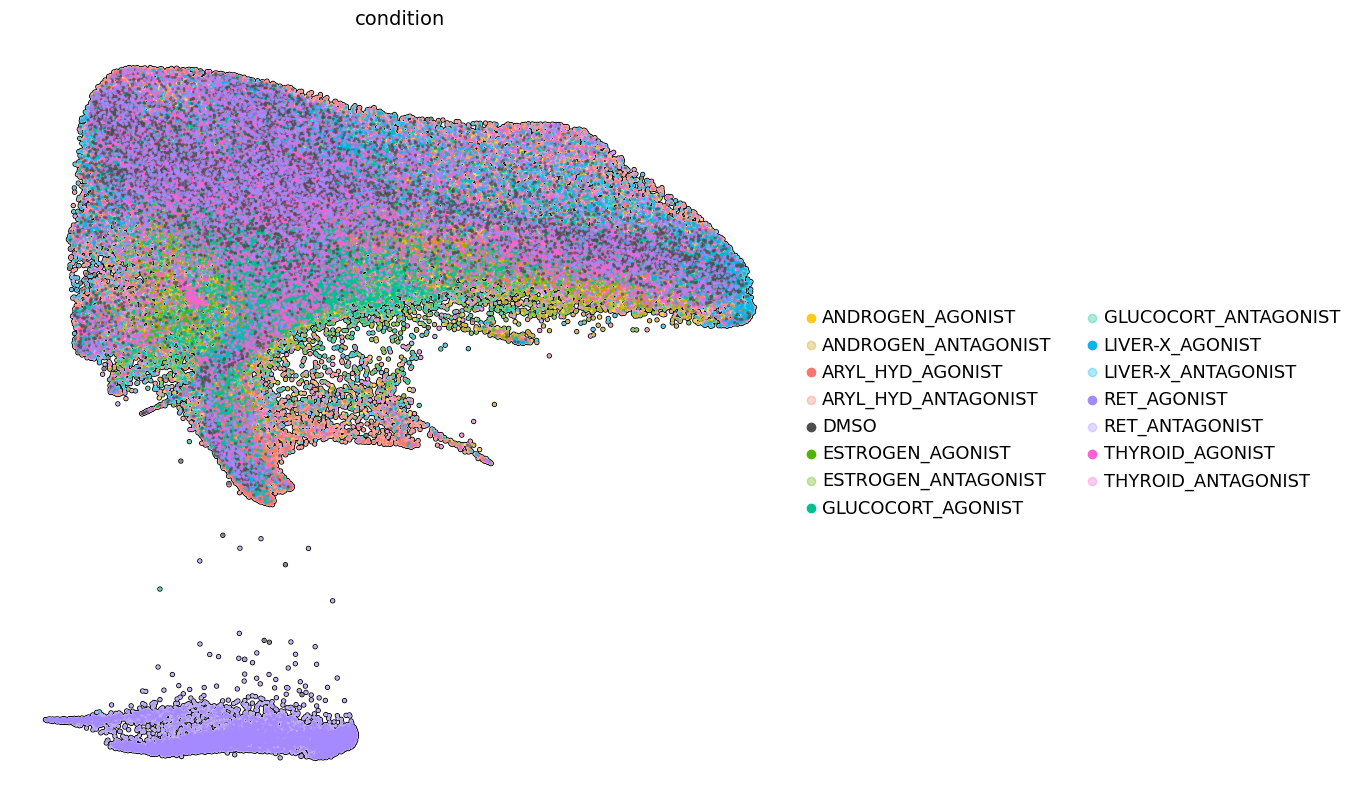

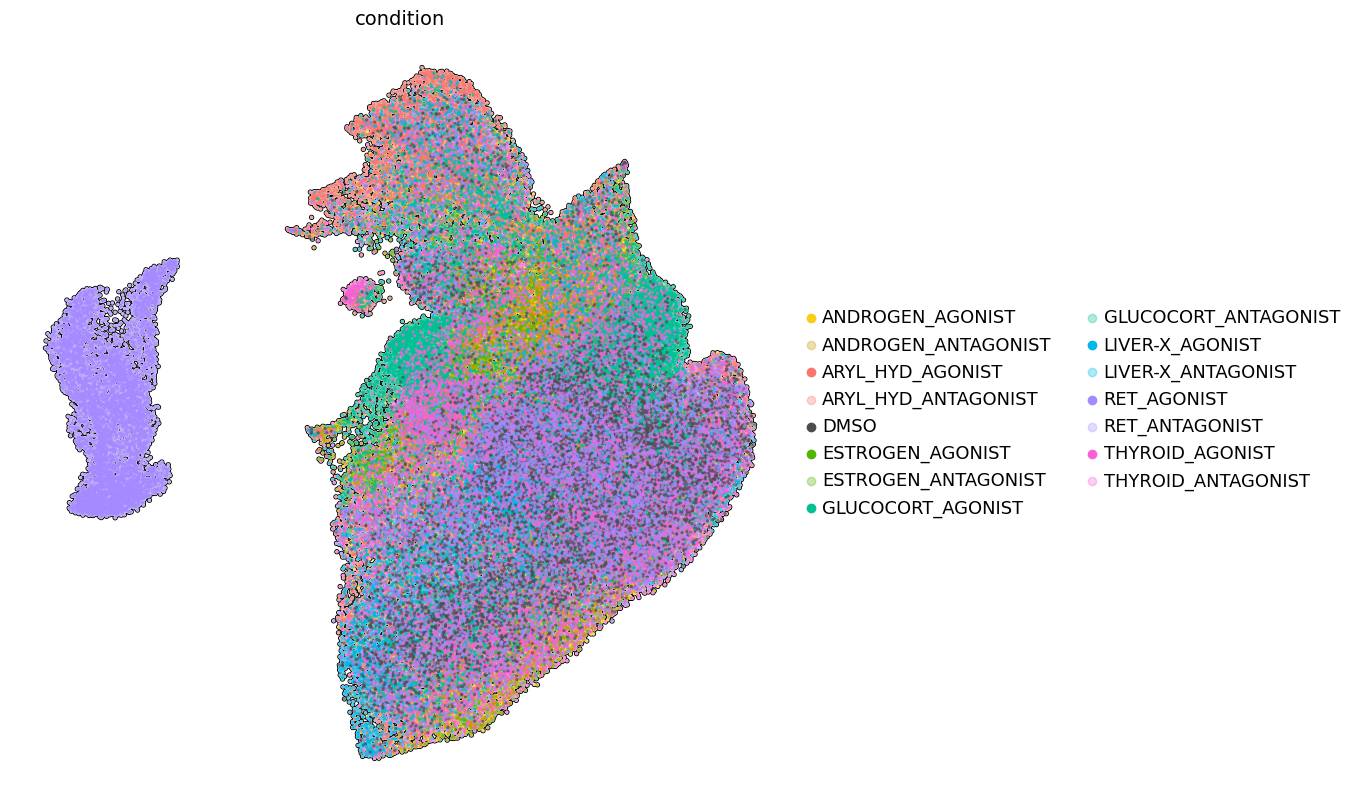

In [9]:

sc.pl.embedding(adataNeurons, basis = "X_draw_graph_fa", color=["condition"], frameon=False, size=20, add_outline=True, save="Neurons_condition.png", palette = color_palette)
sc.pl.umap(adataNeurons,  color=["condition"], frameon=False, size=20, add_outline=True, save="Neurons_condition.png")


# Markers

In [10]:
for m in ["MKI67","ENO2","SOX5","HOXB9","PAX3","LHX1","LHX9","RBP1"]:
    sc.pl.embedding(adataProgenitors, basis = "X_draw_graph_fa", color=m, frameon=False, size=20, cmap="viridis", add_outline=True, vmax="p99", save="Progenitors_{}.png".format(m), show=False)
    sc.pl.embedding(adataNeurons, basis = "X_draw_graph_fa", color=m, frameon=False, size=20, cmap="viridis", add_outline=True, vmax="p99", save="Neurons_{}.png".format(m), show=False)
    sc.pl.umap(adataProgenitors,  color=m, frameon=False, size=20, add_outline=True, vmax="p99",cmap="viridis", save="Progenitors_{}.png".format(m), show=False)
    sc.pl.umap(adataNeurons, color=m, frameon=False, size=20, add_outline=True, vmax="p99",cmap="viridis",save="Neurons_{}.png".format(m), show=False)

# Da plot

In [11]:
colorDict = {'Depleted':"#534ca3", 'Enriched':"#be1622", 'NotEnriched':"white"}

In [12]:
for col in [col for col in adataProgenitors.obs.columns.tolist() if col.endswith("_DA")]:
    unscolors = [colorDict[cat] for cat in adataProgenitors.obs[col].astype("category").cat.categories.tolist()]
    adataProgenitors.uns[f"{col}_colors"] = unscolors
    sc.pl.embedding(adataProgenitors, basis = "X_draw_graph_fa", color=col,groups=["Enriched","Depleted"], frameon=False, size=100, na_color="white",add_outline=True,outline_width=(0.1,0), vmax="p99", save="Progenitors_{}.png".format(col), show=False)
    sc.pl.umap(adataProgenitors,  color=col,groups=["Enriched","Depleted"], frameon=False, size=100, na_color="white",add_outline=True,outline_width=(0.1,0), vmax="p99",  save="Progenitors_{}.png".format(col), show=False)


In [13]:
for col in [col for col in adataNeurons.obs.columns.tolist() if col.endswith("_DA")]:
    unscolors = [colorDict[cat] for cat in adataNeurons.obs[col].astype("category").cat.categories.tolist()]
    adataNeurons.uns[f"{col}_colors"] = unscolors
    sc.pl.embedding(adataNeurons, basis = "X_draw_graph_fa", color=col,groups=["Enriched","Depleted"], frameon=False, size=100, na_color="white",add_outline=True,outline_width=(0.1,0), vmax="p99", save="Neurons_{}.png".format(col), show=False)
    sc.pl.umap(adataNeurons,  color=col,groups=["Enriched","Depleted"], frameon=False, size=100, na_color="white",add_outline=True,outline_width=(0.1,0), vmax="p99",  save="Neurons_{}.png".format(col), show=False)


# Load Whole anndatas

In [14]:
wholeAdata = sc.read_h5ad("/group/testa/Users/davide.castaldi/ENDPOINTS_sc/adatas/6.1.Annotated.{}.h5ad".format(DS))

In [15]:
sc.pl.umap(wholeAdata,  color=["Leiden_1"], frameon=False, size=20, cmap="viridis", add_outline=True, vmax="p99", save="All_leiden.png", show=False)
sc.pl.umap(wholeAdata,  color=["phase"], frameon=False, size=20, cmap="viridis", add_outline=True, vmax="p99", save="All_phase.png", show=False)
sc.pl.umap(wholeAdata,  color=["condition"], frameon=False, size=20, cmap="viridis", add_outline=True, vmax="p99", save="All_condition.png", show=False, palette = color_palette)
sc.pl.umap(wholeAdata,  color=["Consensus_call"], frameon=False, size=20, cmap="viridis", add_outline=True, vmax="p99", save="All_Consensus_call.png", show=False)
sc.pl.umap(wholeAdata,  color=["MacroCelltype"], frameon=False, size=20, cmap="viridis", add_outline=True, vmax="p99", save="All_MacroCelltype.png", show=False)
sc.pl.umap(wholeAdata,  color=["line"], frameon=False, size=20, cmap="viridis", add_outline=True, vmax="p99", save="All_line.png", show=False, palette=line_palette)
sc.pl.umap(wholeAdata,  color=["replicate"], frameon=False, size=20, cmap="viridis", add_outline=True, vmax="p99", save="All_replicate.png", show=False)

<Axes: title={'center': 'replicate'}, xlabel='UMAP1', ylabel='UMAP2'>

In [16]:
for m in ["MKI67","STMN2","NHLH1","VIM"]:
    sc.pl.umap(wholeAdata,  color=m, frameon=False, size=20, cmap="viridis", add_outline=True, vmax="p99", save="All_Consensus_{}.png".format(m), show=False)